In [ ]:
import numpy as np
import keras
from keras import models
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import SGD
from keras import layers
from keras.layers import  Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation
from keras import Input
from keras import regularizers
from keras.models import load_model

import os
from keras.preprocessing.image import load_img,img_to_array
from keras.callbacks import Callback
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint , LearningRateScheduler
import keras.callbacks
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score



# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)


# Read the training sample and set the batch size
train_generator = train_datagen.flow_from_directory(
        "../input//irdid-final//data//data//Train//",
        target_size=(256, 256),
        batch_size=64,
        class_mode='categorical',
        shuffle = True)
valid_generator = valid_datagen.flow_from_directory(
        "../input//irdid-final//data//data//Val//",
        target_size=(256, 256),
        batch_size=64,
        class_mode='categorical',
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        "../input//irdid-final//data//data//Testing//",
        target_size=(256,256),
        batch_size=64,
        class_mode='categorical',
        shuffle=False)

from PIL import Image
import os, sys



Using TensorFlow backend.


Found 4739 images belonging to 5 classes.
Found 674 images belonging to 5 classes.
Found 1351 images belonging to 5 classes.


In [ ]:
model = models.Sequential()
model = load_model("../input/weights/BestModel300v8.hdf5")

# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile("adam", loss='categorical_crossentropy', metrics=['acc'])
#tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

filepath="BestModel.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Train the model
history = model.fit_generator(train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=100,
      validation_data = valid_generator,
      validation_steps = valid_generator.samples/valid_generator.batch_size,
        #callbacks = [metrics],
        #callbacks=[tbCallBack],
        callbacks = callbacks_list,
      verbose=1)

model.save('cnn_classification.h5')
model.save_weights('weights.h5')

Epoch 1/100
75/74 [==============================] - 104s 1s/step - loss: 0.3080 - acc: 0.9512 - val_loss: 0.5767 - val_acc: 0.8843

Epoch 00001: val_acc improved from -inf to 0.88427, saving model to BestModel.hdf5
Epoch 2/100
75/74 [==============================] - 87s 1s/step - loss: 0.3018 - acc: 0.9527 - val_loss: 0.8570 - val_acc: 0.8071

Epoch 00002: val_acc did not improve from 0.88427
Epoch 3/100
75/74 [==============================] - 89s 1s/step - loss: 0.4451 - acc: 0.9133 - val_loss: 0.5244 - val_acc: 0.8813

Epoch 00003: val_acc did not improve from 0.88427
Epoch 4/100
75/74 [==============================] - 89s 1s/step - loss: 0.3090 - acc: 0.9504 - val_loss: 0.5640 - val_acc: 0.8680

Epoch 00004: val_acc did not improve from 0.88427
Epoch 5/100
75/74 [==============================] - 89s 1s/step - loss: 0.2981 - acc: 0.9504 - val_loss: 0.6581 - val_acc: 0.8487

Epoch 00005: val_acc did not improve from 0.88427
Epoch 6/100
75/74 [==============================] - 88s

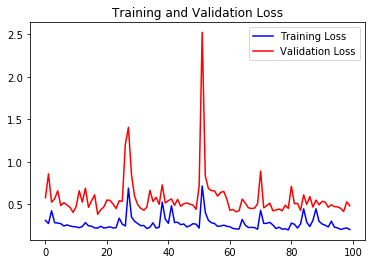

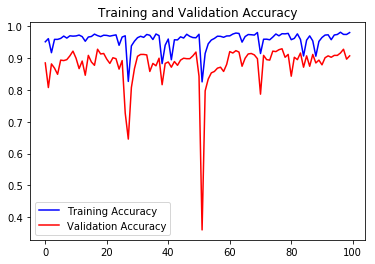

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

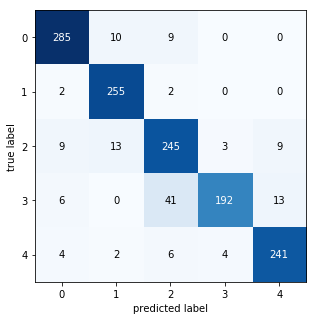

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       304
           1       0.91      0.98      0.95       259
           2       0.81      0.88      0.84       279
           3       0.96      0.76      0.85       252
           4       0.92      0.94      0.93       257

    accuracy                           0.90      1351
   macro avg       0.91      0.90      0.90      1351
weighted avg       0.91      0.90      0.90      1351



In [ ]:


train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']


f =open("Results.doc",'a')
f.writelines("\nTrain Accuracy \n"+str(train_acc))
f.writelines("\n\nVal Accuracy \n"+ str(val_acc))
f.writelines("\n\bTrain Loss \n"+str(train_loss))
f.writelines("\n\nVal Loss \n"+str(val_loss))
f.close()

epochs = range(len(train_acc))


plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
plt.savefig('loss_cmp.png')

plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()
plt.savefig('acc_comp.png')


from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import classification_report
def test_model(model):
    count=0
    c=0
    cl = 0
    true=[]
    predict=[]
    for j in ["0","1","2","3","4"]:
        #l = os.listdir("..//input//irdid-final//data//data//Testing//"+j)
        l = os.listdir("../input//irdid-final//data//data//Testing//"+j)
        count += len(l)
        for i in l:
            img = load_img("..//input//irdid-final//data//data//Testing//"+j+'/'+i, target_size=(256, 256))
            #img = load_img("../input//irdid-final//data//data//Testing//"j+'/'+i, target_size=(512, 512))
            img = img_to_array(img)
            true.append(cl)
            x = np.expand_dims(img.copy(), axis=0)
            x /= 255
            pred_class = model.predict_classes(x)
            predict.append(pred_class[0])
            pred = model.predict(x)
            if pred_class[0] == cl:
                c+=1
            #print(l.index(i),'/',len(l))
        cl+=1
    CM = confusion_matrix(true, predict)
    CR = classification_report(true, predict)
    fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
    plt.show()
    print(CR)


#model = models.Sequential()
#model = load_model("../input/weights/BestModel300v9.hdf5")
test_model(model)



In [ ]:
import numpy as np
import keras
from keras import models
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import SGD
from keras import layers
from keras.layers import  Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation
from keras import Input
from keras.models import load_model

from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score


scores = model.evaluate_generator(test_generator,
      steps=test_generator.samples/test_generator.batch_size)

print("\n%s: %.2f%%"%(model.metrics_names[1], scores[1]*100))


acc: 90.16%
